# Exercise with selenium
## Part 1

* You must first retrieve the top 100 scoring posts from [https://old.reddit.com/top/?sort=top&t=all](https://old.reddit.com/top/?sort=top&t=all). You will need to walk through multiple pages, using the `next` button.
* Save the links in a list of `Post` objects. The `Post` object must contain:
    * The id of the post.
    * The title of the post.
    * The exact score of the post.
    * The subreddit the post was submitted to. 

## Part 2

What are the most popular subreddits in the top 100 posts?

* Find the frequency of all the subreddits in the 100 top posts. Store them in a dictionary where `subreddit=>frequency`.
* Sort the dictionary by descending value. 
* Plot the frequencies on a bar chart, where the `y`-axis is the frequency, and the `x`-axis is the subreddit name.

## Part 3

Search reddit using selenium.

Create a function that can retrieve the top `n` search results (posts) given a `search_term`.

```python
def search_reddit(search_term, n):
   pass
```

*remember to use `old.reddit.com` to aviod SPA.*



# Dependencies from requirements.txt
networkx==2.2
backcall==0.1.0
bleach==3.0.2
cycler==0.10.0
decorator==4.3.0
defusedxml==0.5.0
entrypoints==0.2.3
et-xmlfile==1.0.1
ipykernel==5.1.0
ipython==7.2.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
jdcal==1.4
jedi==0.13.2
Jinja2==2.10
jsonschema==2.6.0
jupyter==1.0.0
jupyter-client==5.2.4
jupyter-console==6.0.0
jupyter-core==4.4.0
kiwisolver==1.0.1
MarkupSafe==1.1.0
matplotlib==3.0.2
mistune==0.8.4
nbconvert==5.4.0
nbformat==4.4.0
notebook==5.7.4
numpy==1.16.0
openpyxl==2.6.0
pandas==0.24.1
pandocfilters==1.4.2
parso==0.3.1
pexpect==4.6.0
pickleshare==0.7.5
prometheus-client==0.5.0
prompt-toolkit==2.0.7
ptyprocess==0.6.0
Pygments==2.3.1
pyparsing==2.3.1
python-dateutil==2.7.5
pytz==2018.9
pyzmq==17.1.2
qtconsole==4.4.3
rise==5.4.1
scikit-learn==0.20.2
scipy==1.2.0
Send2Trash==1.5.0
six==1.12.0
sklearn==0.0
terminado==0.8.1
testpath==0.4.2
tornado==5.1.1
traitlets==4.3.2
wcwidth==0.1.7
webencodings==0.5.1
widgetsnbextension==3.4.2

In [1]:
from selenium import webdriver

browser = webdriver.Chrome()

In [42]:
import json

class Post:
    def __init__(self, _id, title, score, subreddit):
        self.id = _id
        self.title = title
        self.score = int(score)
        self.subreddit = subreddit
        
    def __str__(self):
        return "{}, {}, {}, {}".format(self.id, self.title, self.score, self.subreddit)

def reddit_top_n(browser, n=100):
    browser.get('https://old.reddit.com/top/?sort=top&t=all')
    results = []
    
    def webscrape_page(browser, results):
        links = browser.find_elements_by_css_selector('#siteTable>div.link')
        for link in links:
            _id   = link.get_property('id')
            title = link.find_element_by_xpath(".//a[contains(@class, 'title')]").text
            score = link.get_attribute('data-score')
            subreddit = link.get_attribute('data-subreddit')
            results.append(Post(_id, title, score, subreddit))
    
    while True:
        webscrape_page(browser, results)
        browser.find_element_by_css_selector('.next-button a').click()
        if len(results) >= n:
            return results[:n]
    

In [43]:
posts = reddit_top_n(browser)
print(len(posts))

100


In [31]:
from collections import defaultdict
def subreddit_freq(posts):
    result = defaultdict(int)
    for post in posts:
        result[post.subreddit] = result[post.subreddit] +  1
    
    return result

freq = subreddit_freq(posts)
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
freq

[('pics', 42),
 ('funny', 16),
 ('gifs', 13),
 ('IAmA', 5),
 ('worldnews', 4),
 ('news', 4),
 ('aww', 4),
 ('movies', 3),
 ('gaming', 2),
 ('videos', 2),
 ('announcements', 1),
 ('mildlyinteresting', 1),
 ('blog', 1),
 ('todayilearned', 1),
 ('AskReddit', 1)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

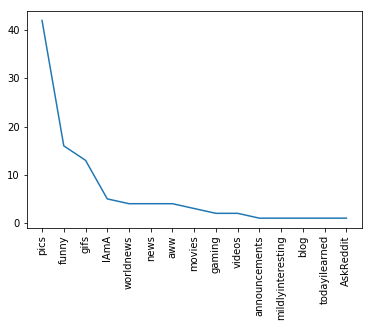

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

keys = [item[0] for item in freq]
values = [item[1] for item in freq]

plt.plot(keys, values)
plt.xticks(rotation=90)


([], <a list of 0 Text xticklabel objects>)

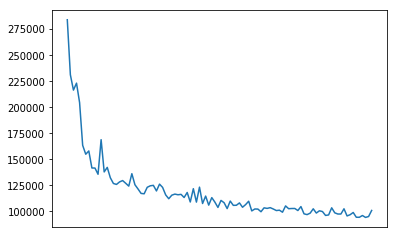

In [55]:
scores = [post.score for post in posts]
ids = [post.id for post in posts]
plt.plot(ids, scores)
plt.xticks([]) # dont show x-axis
